<a href="https://colab.research.google.com/github/nirmaljb/deep-learning-notebooks/blob/main/mri_for_alzheimers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings

warnings.filterwarnings("ignore")
train_dir = '/content/drive/MyDrive/alzheimer dataset/train'
test_dir = '/content/drive/MyDrive/alzheimer dataset/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.4,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)
val_test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

val_generator = val_test_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    color_mode='grayscale',
    class_mode='categorical'
)

Found 3719 images belonging to 4 classes.
Found 4647 images belonging to 4 classes.
Found 1813 images belonging to 4 classes.


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

CNN1 = Sequential()

CNN1.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(2,2))

CNN1.add(Conv2D(64, (3,3), activation='relu'))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(2,2))

CNN1.add(Conv2D(128, (3,3), activation='relu'))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(2,2))

CNN1.add(Conv2D(256, (3,3), activation='relu'))
CNN1.add(BatchNormalization())
CNN1.add(MaxPooling2D(2,2))

CNN1.add(Flatten())

CNN1.add(Dense(128, activation='relu'))
CNN1.add(Dropout(0.4))

CNN1.add(Dense(64, activation='relu'))
CNN1.add(Dropout(0.3))

CNN1.add(Dense(4, activation='softmax'))

optimizer = Adam(learning_rate=3e-4)
CNN1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
CNN1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,052 (6.02 MB)

 Trainable params: 1,577,092 (6.02 MB)

 Non-trainable params: 960 (3.75 KB)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
callbacks = [
    EarlyStopping(monitor="val_loss", patience=6, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, min_lr=1e-6)
]

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 32s 275ms/step - accuracy: 0.5490 - loss: 1.0568 - val_accuracy: 0.5784 - val_loss: 1.6141 - learning_rate: 3.0000e-04
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.5684 - loss: 1.0155 - val_accuracy: 0.5922 - val_loss: 1.1780 - learning_rate: 3.0000e-04
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 30s 260ms/step - accuracy: 0.5764 - loss: 0.9740 - val_accuracy: 0.5965 - val_loss: 1.4815 - learning_rate: 3.0000e-04
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 29s 252ms/step - accuracy: 0.5757 - loss: 0.9648 - val_accuracy: 0.5937 - val_loss: 0.9071 - learning_rate: 3.0000e-04
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 29s 249ms/step - accuracy: 0.5719 - loss: 0.9529 - val_accuracy: 0.5935 - val_loss: 1.0030 - learning_rate: 3.0000e-04
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 29s 249ms/step - accuracy: 0.5898 - loss: 0.9386 - val_accuracy: 0.5935 - val_loss: 1.0586 - learning_rate: 3.0000e-04
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 29s 24

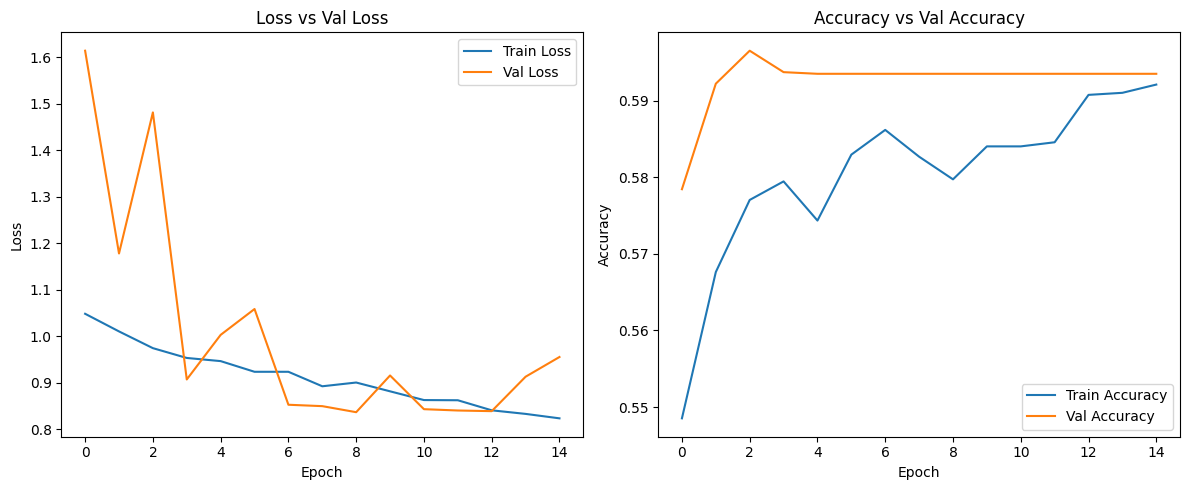

In [42]:
import matplotlib.pyplot as plt
history = CNN1.fit(train_generator, validation_data=val_generator, callbacks=callbacks, epochs=50)
# Loss plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Loss vs Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.title("Accuracy vs Val Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
loss, accuray = CNN1.evaluate(test_generator)
print("Loss: ", loss)
print("Accuracy: ", accuray)

 1/57 ━━━━━━━━━━━━━━━━━━━━ 4:27 5s/step - accuracy: 0.3125 - loss: 1.1726

KeyboardInterrupt: 

In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

val_generator.reset()
y_prob = CNN1.predict(val_generator, verbose=0)
y_pred = np.argmax(y_prob, axis=1)
y_true = val_generator.classes

print("Predicted class counts:", np.bincount(y_pred))
print("True class counts     :", np.bincount(y_true))
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=4))

Predicted class counts: [   0    0 4647]
True class counts     : [ 556   60 2758 1273]
[[   0    0  556    0]
 [   0    0   60    0]
 [   0    0 2758    0]
 [   0    0 1273    0]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       556
           1     0.0000    0.0000    0.0000        60
           2     0.5935    1.0000    0.7449      2758
           3     0.0000    0.0000    0.0000      1273

    accuracy                         0.5935      4647
   macro avg     0.1484    0.2500    0.1862      4647
weighted avg     0.3522    0.5935    0.4421      4647

